# Wine Quality Dataset Analysis

Dataset is provided from; https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing necessary libraries

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

## Extract the dataset to pandas dataframe

In [0]:
df_red = pd.read_csv("/content/drive/My Drive/DataAnalysis/WineQuality/winequality-red.csv",sep=";")
df_white = pd.read_csv("/content/drive/My Drive/DataAnalysis/WineQuality/winequality-white.csv",sep=";")

Let's check what we have imported.

In [58]:
df_red.head(-1)

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.4             0.700         0.00  ...       0.56      9.4        5
1               7.8             0.880         0.00  ...       0.68      9.8        5
2               7.8             0.760         0.04  ...       0.65      9.8        5
3              11.2             0.280         0.56  ...       0.58      9.8        6
4               7.4             0.700         0.00  ...       0.56      9.4        5
...             ...               ...          ...  ...        ...      ...      ...
1593            6.8             0.620         0.08  ...       0.82      9.5        6
1594            6.2             0.600         0.08  ...       0.58     10.5        5
1595            5.9             0.550         0.10  ...       0.76     11.2        6
1596            6.3             0.510         0.13  ...       0.75     11.0        6
1597            5.9             0.645         0.12  ...       0.71     10.2        5

[1598 rows x 12 columns]

In [59]:
df_white.head(-1)

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.0              0.27         0.36  ...       0.45      8.8        6
1               6.3              0.30         0.34  ...       0.49      9.5        6
2               8.1              0.28         0.40  ...       0.44     10.1        6
3               7.2              0.23         0.32  ...       0.40      9.9        6
4               7.2              0.23         0.32  ...       0.40      9.9        6
...             ...               ...          ...  ...        ...      ...      ...
4892            6.5              0.23         0.38  ...       0.54      9.7        5
4893            6.2              0.21         0.29  ...       0.50     11.2        6
4894            6.6              0.32         0.36  ...       0.46      9.6        5
4895            6.5              0.24         0.19  ...       0.46      9.4        6
4896            5.5              0.29         0.30  ...       0.38     12.8        7

[4897 rows x 12 columns]

## Information regarding to the datasets

In [60]:
print("Column names for red wine:",list(df_red.columns))
print("Column names for white wine:",list(df_white.columns))

Column names for red wine: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
Column names for white wine: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [61]:
df_red.describe()

fixed acidity  volatile acidity  ...      alcohol      quality
count    1599.000000       1599.000000  ...  1599.000000  1599.000000
mean        8.319637          0.527821  ...    10.422983     5.636023
std         1.741096          0.179060  ...     1.065668     0.807569
min         4.600000          0.120000  ...     8.400000     3.000000
25%         7.100000          0.390000  ...     9.500000     5.000000
50%         7.900000          0.520000  ...    10.200000     6.000000
75%         9.200000          0.640000  ...    11.100000     6.000000
max        15.900000          1.580000  ...    14.900000     8.000000

[8 rows x 12 columns]

In [62]:
df_white.describe()

fixed acidity  volatile acidity  ...      alcohol      quality
count    4898.000000       4898.000000  ...  4898.000000  4898.000000
mean        6.854788          0.278241  ...    10.514267     5.877909
std         0.843868          0.100795  ...     1.230621     0.885639
min         3.800000          0.080000  ...     8.000000     3.000000
25%         6.300000          0.210000  ...     9.500000     5.000000
50%         6.800000          0.260000  ...    10.400000     6.000000
75%         7.300000          0.320000  ...    11.400000     6.000000
max        14.200000          1.100000  ...    14.200000     9.000000

[8 rows x 12 columns]

In [63]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [64]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


## Check NaN in the datasets

In [65]:
for column in df_red.columns:
  print("Column name:",column, "\nCount of NaN values:",df_red[column].isnull().sum(),"\n")

print("----------------------------------")

for column in df_white.columns:
  print("Column name:",column, "\nCount of NaN values:",df_white[column].isnull().sum(),"\n")

Column name: fixed acidity 
Count of NaN values: 0 

Column name: volatile acidity 
Count of NaN values: 0 

Column name: citric acid 
Count of NaN values: 0 

Column name: residual sugar 
Count of NaN values: 0 

Column name: chlorides 
Count of NaN values: 0 

Column name: free sulfur dioxide 
Count of NaN values: 0 

Column name: total sulfur dioxide 
Count of NaN values: 0 

Column name: density 
Count of NaN values: 0 

Column name: pH 
Count of NaN values: 0 

Column name: sulphates 
Count of NaN values: 0 

Column name: alcohol 
Count of NaN values: 0 

Column name: quality 
Count of NaN values: 0 

----------------------------------
Column name: fixed acidity 
Count of NaN values: 0 

Column name: volatile acidity 
Count of NaN values: 0 

Column name: citric acid 
Count of NaN values: 0 

Column name: residual sugar 
Count of NaN values: 0 

Column name: chlorides 
Count of NaN values: 0 

Column name: free sulfur dioxide 
Count of NaN values: 0 

Column name: total sulfur dio

There is no NaN value in the datasets.

In [66]:
for column in df_red.columns:
  print("Column:",column)
  print("Unique Values:",df_red[column].unique())

Column: fixed acidity
Unique Values: [ 7.4  7.8 11.2  7.9  7.3  7.5  6.7  5.6  8.9  8.5  8.1  7.6  6.9  6.3
  7.1  8.3  5.2  5.7  8.8  6.8  4.6  7.7  8.7  6.4  6.6  8.6 10.2  7.
  7.2  9.3  8.   9.7  6.2  5.   4.7  8.4 10.1  9.4  9.   8.2  6.1  5.8
  9.2 11.5  5.4  9.6 12.8 11.  11.6 12.  15.  10.8 11.1 10.  12.5 11.8
 10.9 10.3 11.4  9.9 10.4 13.3 10.6  9.8 13.4 10.7 11.9 12.4 12.2 13.8
  9.1 13.5 10.5 12.6 14.  13.7  9.5 12.7 12.3 15.6  5.3 11.3 13.   6.5
 12.9 14.3 15.5 11.7 13.2 15.9 12.1  5.1  4.9  5.9  6.   5.5]
Column: volatile acidity
Unique Values: [0.7   0.88  0.76  0.28  0.66  0.6   0.65  0.58  0.5   0.615 0.61  0.62
 0.56  0.59  0.32  0.22  0.39  0.43  0.49  0.4   0.41  0.71  0.645 0.675
 0.685 0.655 0.605 0.38  1.13  0.45  0.67  0.52  0.935 0.29  0.31  0.51
 0.42  0.63  0.69  0.735 0.725 0.705 0.785 0.75  0.625 0.3   0.55  1.02
 0.775 0.9   0.545 0.575 0.33  0.54  1.07  0.695 1.33  0.745 1.04  0.715
 0.415 0.34  0.68  0.95  0.53  0.64  0.885 0.805 0.73  0.37  0.835 1.09
 0

In [67]:
for column in df_red.columns:
  print("Column:",column)
  print("Unique Values:",df_white[column].unique())

Column: fixed acidity
Unique Values: [ 7.    6.3   8.1   7.2   6.2   8.6   7.9   6.6   8.3   7.4   6.5   6.4
  6.8   7.6   6.9   8.5   5.8   7.3   6.7   6.    7.1   6.1   7.5   9.8
  5.5   5.9   7.8   5.7   8.2   5.6   5.2   8.4  10.2   7.7   5.3   5.4
  9.1   5.    8.   10.    5.1   9.2   9.    8.8   8.7   4.8  10.3   9.4
  9.6   9.3   8.9   9.7  10.7  14.2   9.9   9.5  11.8   4.6   6.15  4.5
  7.15  6.45  4.2   4.9   4.7   3.8   4.4   3.9 ]
Column: volatile acidity
Unique Values: [0.27  0.3   0.28  0.23  0.32  0.22  0.18  0.16  0.42  0.17  0.48  0.66
 0.34  0.31  0.26  0.67  0.25  0.24  0.14  0.12  0.39  0.33  0.45  0.46
 0.19  0.2   0.21  0.38  0.47  0.35  0.54  0.43  0.44  0.265 0.36  0.305
 0.13  0.41  0.485 0.425 0.37  0.255 0.595 0.29  0.53  0.15  0.57  0.4
 0.245 0.685 0.495 0.64  0.52  0.115 0.58  0.585 0.59  0.6   0.55  0.125
 0.1   0.145 0.335 0.365 0.905 0.49  0.155 0.51  0.62  0.345 0.475 0.56
 0.235 0.105 0.5   0.11  0.225 0.395 0.655 0.205 0.415 0.705 0.08  0.68
 0.275 0

## Exploratory Data Analysis - (EDA)

### Red Wine

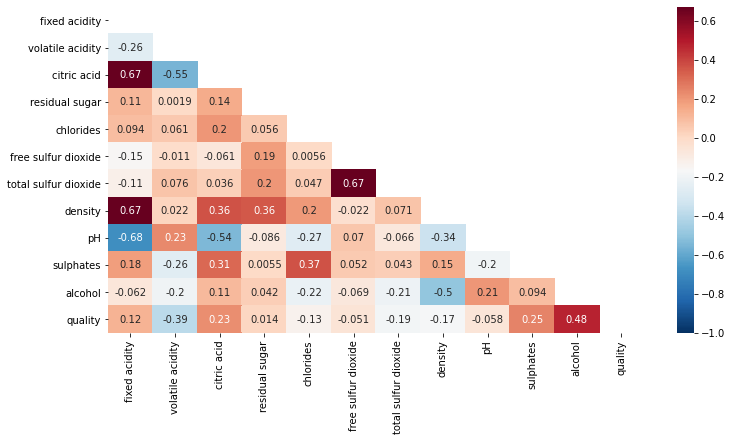

In [68]:
plt.figure(figsize=(12,6))
mask = np.triu(np.ones_like(df_red.corr(), dtype=np.bool))
sns.heatmap(df_red.corr(),annot=True,mask=mask,linewidths=0, vmin=-1, cmap="RdBu_r")

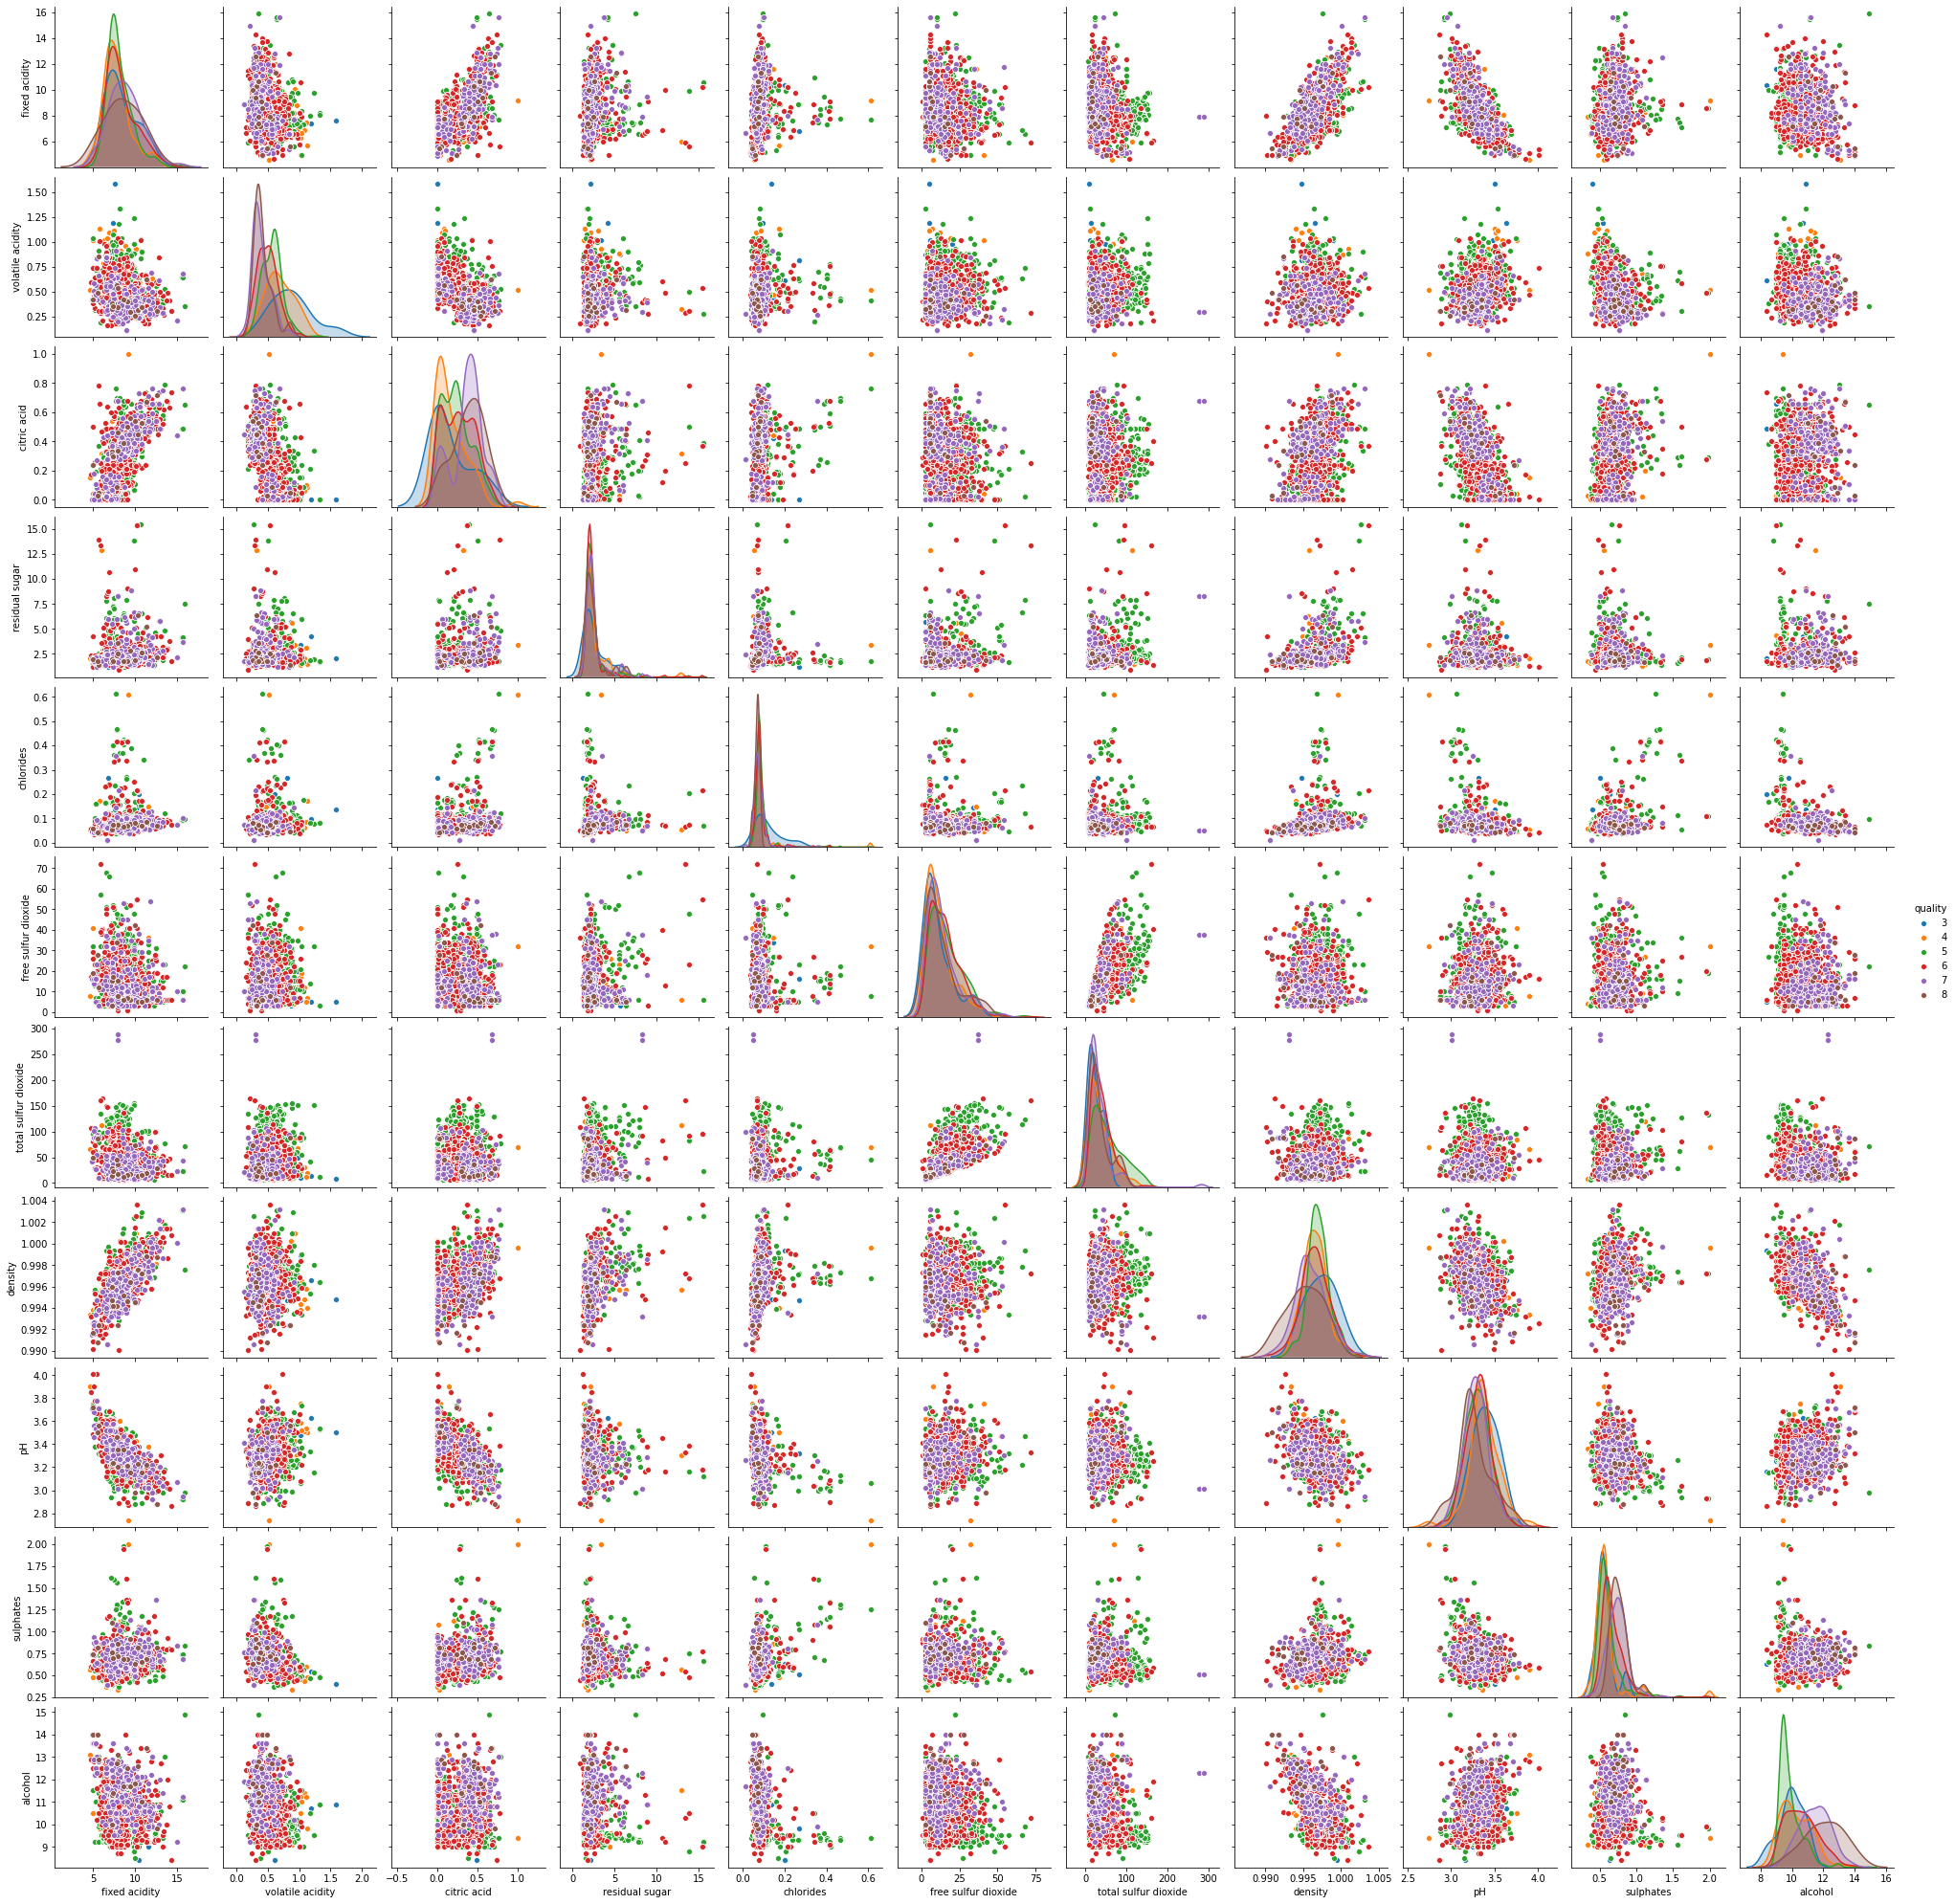

In [69]:
sns.pairplot(df_red,hue="quality")

<BarContainer object of 6 artists>

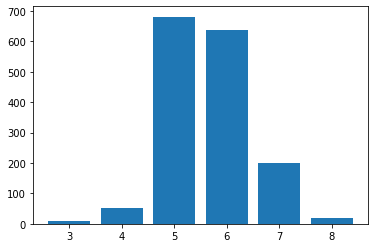

In [70]:
plt.bar(df_red["quality"].unique(),df_red["quality"].value_counts())

#### Sub-Classing (Bad,Medium,Good)

In [0]:
rating = ['bad','medium','good']
df_new_red = df_red.copy()
for index, row in df_new_red.iterrows():
  if(row.quality < 6):
    row = rating[0]
  elif(row.quality == 6 ):
    row = rating[1]
  else:
    row = rating[2]
  df_new_red.at[index,"rating"] = row
df_new_red.drop(["quality"],axis=1,inplace=True)

<BarContainer object of 3 artists>

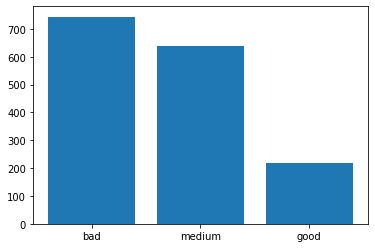

In [72]:
plt.bar(df_new_red["rating"].unique(),df_new_red["rating"].value_counts())

#### Sub-Classing (Bad,Good)

In [0]:
rating = ['bad','good']
df_bin_red = df_red.copy()
for index, row in df_bin_red.iterrows():
  if(row.quality <= 6):
    row = rating[0]
  else:
    row = rating[1]
  df_bin_red.at[index,"rating"] = row
df_bin_red.drop(["quality"],axis=1,inplace=True)

<BarContainer object of 2 artists>

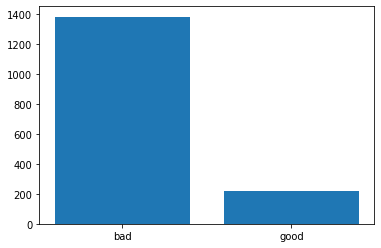

In [74]:
plt.bar(df_bin_red["rating"].unique(),df_bin_red["rating"].value_counts())

### White Wine

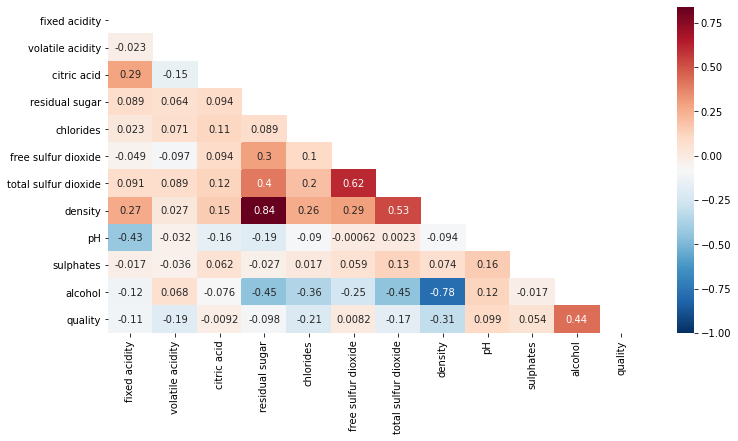

In [75]:
plt.figure(figsize=(12,6))
mask = np.triu(np.ones_like(df_white.corr(), dtype=np.bool))
sns.heatmap(df_white.corr(),annot=True,mask=mask,linewidths=0, vmin=-1, cmap="RdBu_r")

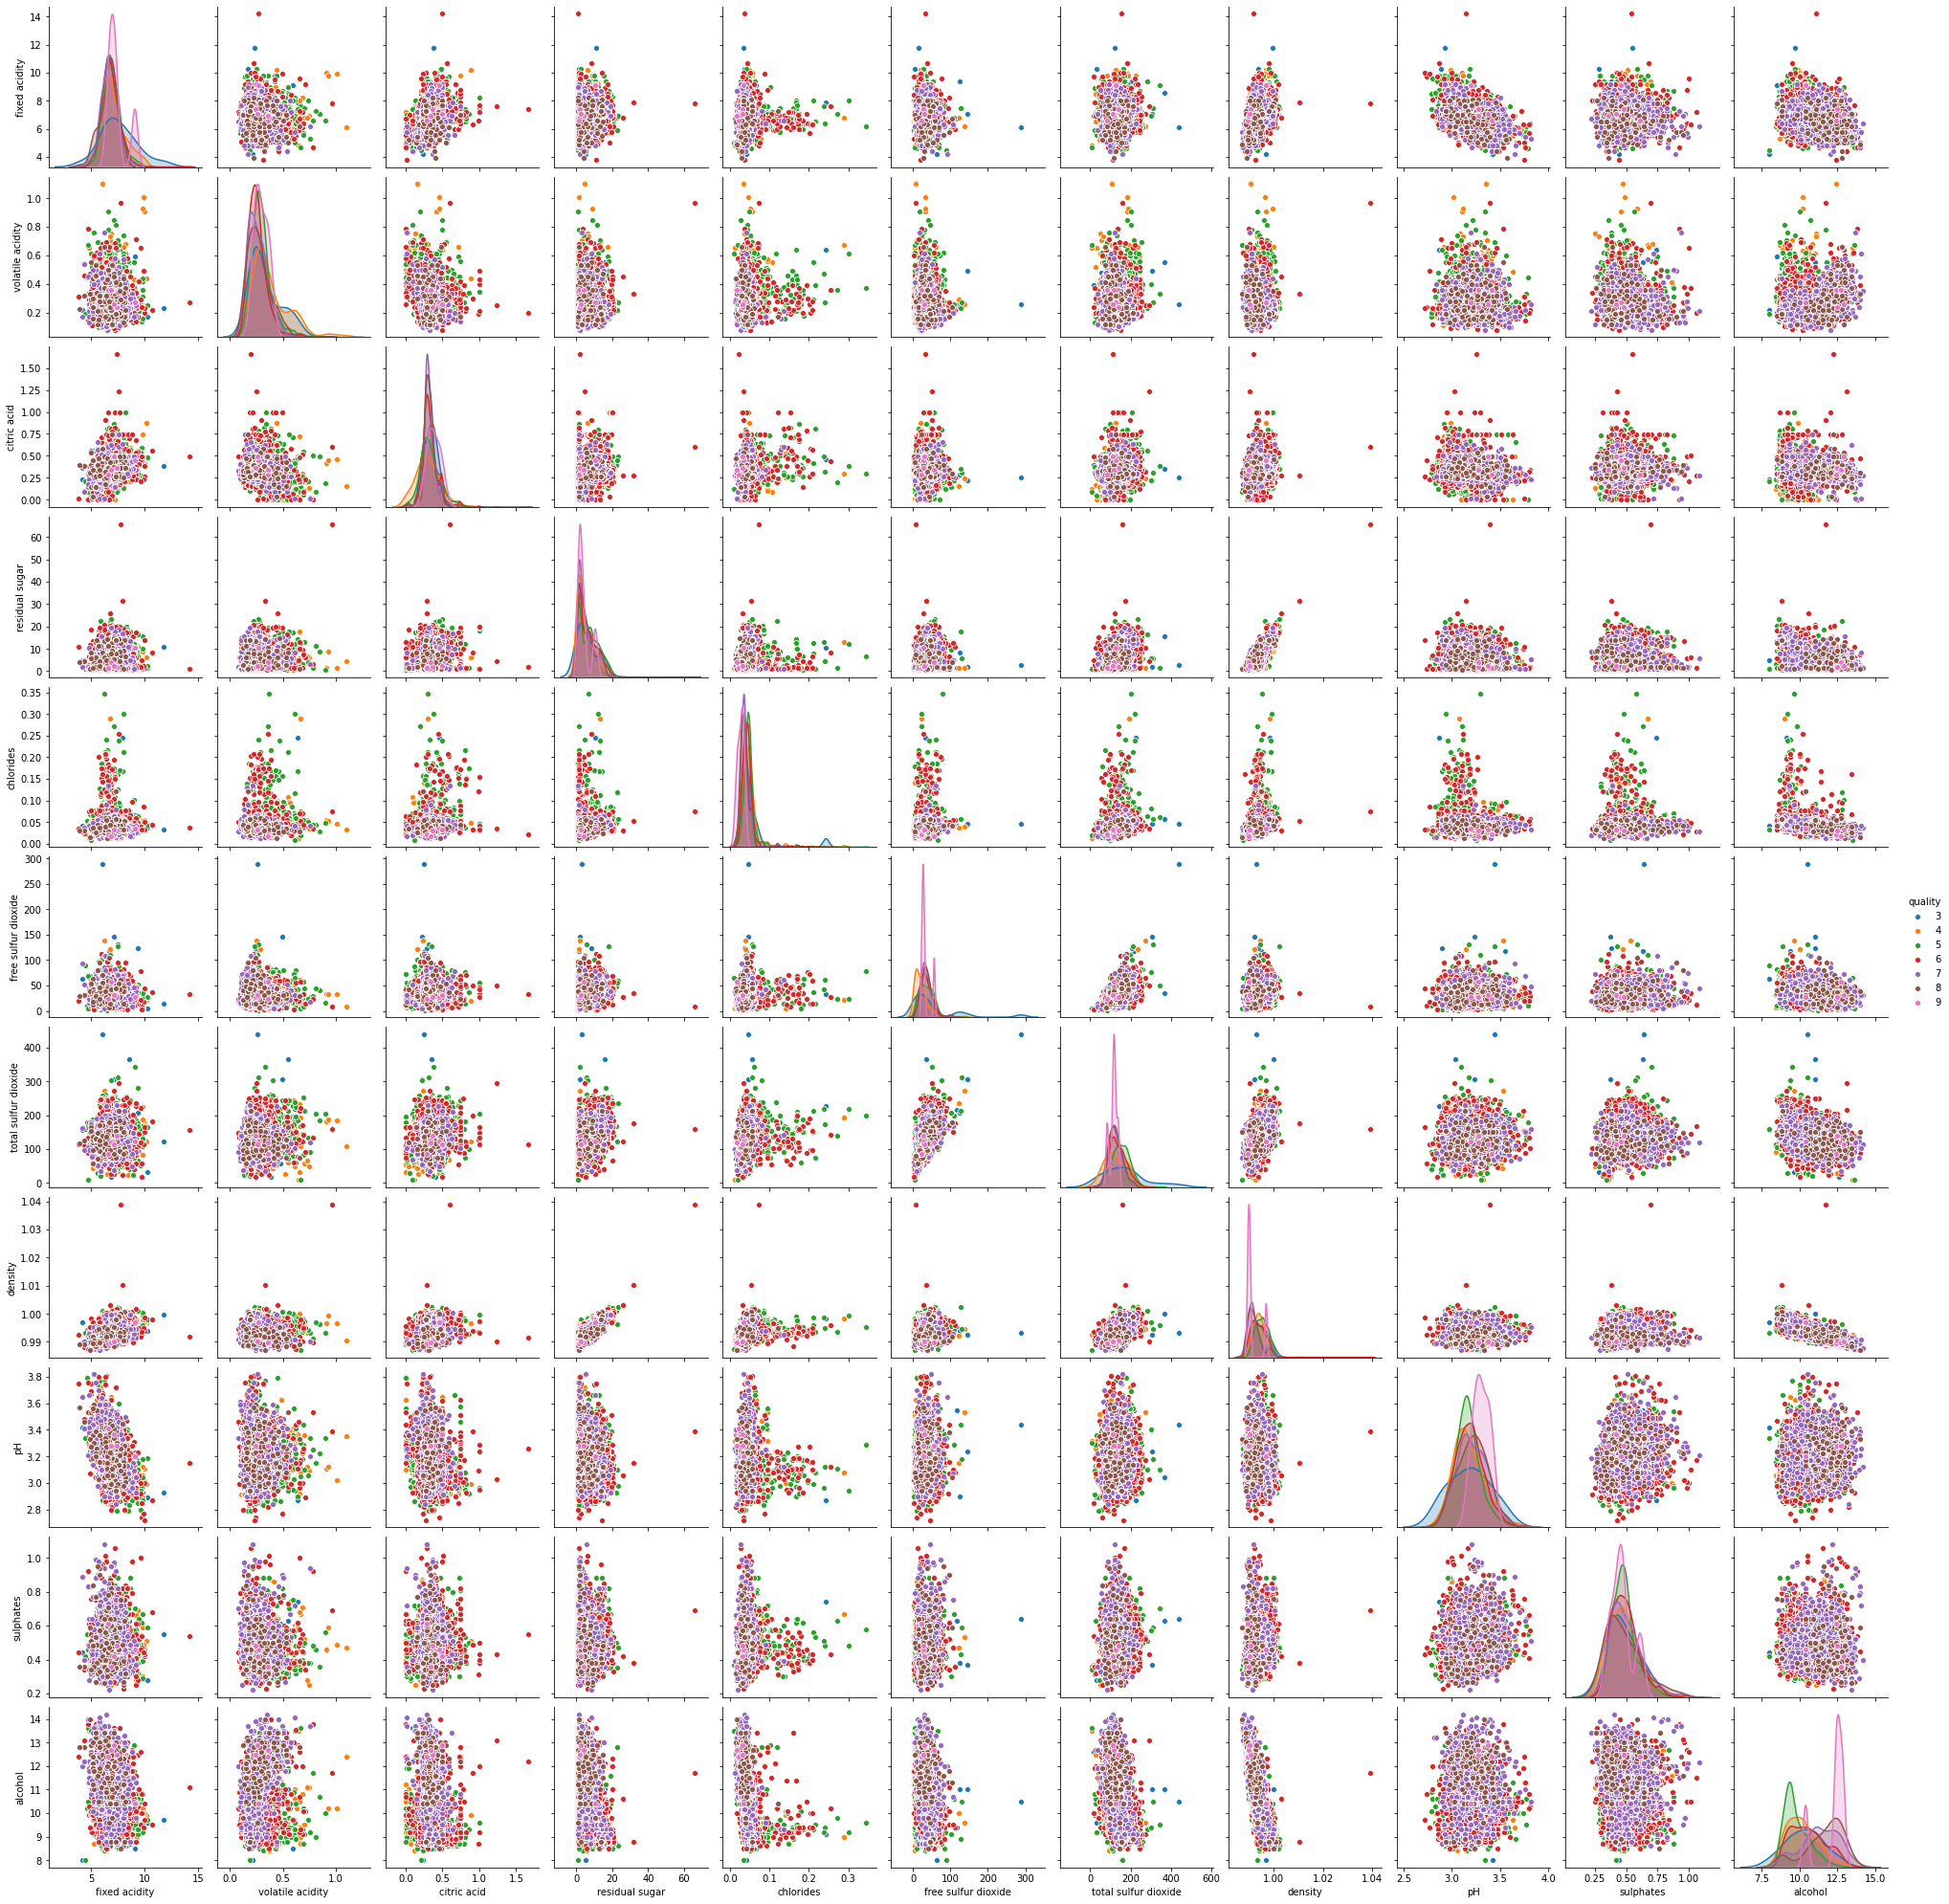

In [76]:
sns.pairplot(df_white,hue="quality")

<BarContainer object of 7 artists>

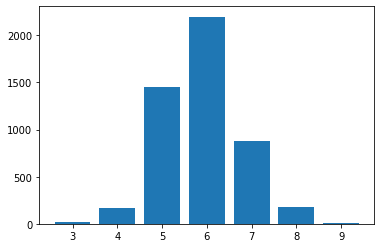

In [77]:
plt.bar(df_white["quality"].unique(),df_white["quality"].value_counts())

#### Sub-Classing (Bad,Medium,Good)

In [0]:
rating = ['bad','medium','good']
df_new_white = df_white.copy()
for index, row in df_new_white.iterrows():
  if(row.quality < 6):
    row = rating[0]
  elif(row.quality == 6 ):
    row = rating[1]
  else:
    row = rating[2]
  df_new_white.at[index,"rating"] = row
df_new_white.drop(["quality"],axis=1,inplace=True)

<BarContainer object of 3 artists>

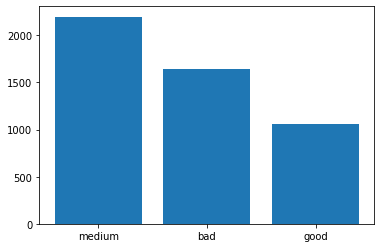

In [79]:
plt.bar(df_new_white["rating"].unique(),df_new_white["rating"].value_counts())

#### Sub-Classing (Bad,Good)

In [0]:
rating = ['bad','good']
df_bin_white = df_white.copy()
for index, row in df_bin_white.iterrows():
  if(row.quality <= 6):
    row = rating[0]
  else:
    row = rating[1]
  df_bin_white.at[index,"rating"] = row
df_bin_white.drop(["quality"],axis=1,inplace=True)

<BarContainer object of 2 artists>

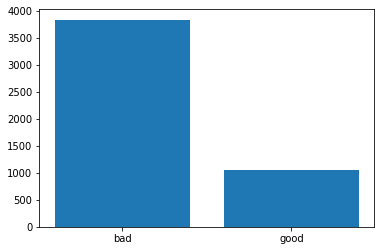

In [81]:
plt.bar(df_bin_white["rating"].unique(),df_bin_white["rating"].value_counts())

# Model Selection&Build

We will try to evaluate models with regarding to three sequences.First sequence will contain all of the quality measures from 3 to 8 for red wine and 3 to 9 for white wine.

Second sequence will contain only three quality measures, bad,medium,good.

For the final sequence ,we will try to evaluate a model for binary classification.Quality measures stated as good or bad.

* Gaussian Naive Bayes
* Logistic Regression
* SVM
* Random Forest Classifier
* XGBoost Classifier

## Red Wine

### Without Sub-Classification

Train,test splitting using test size = 0.2 and random state as 42

In [0]:
train_red_X, test_red_X, train_red_y, test_red_y = train_test_split(df_red.drop(["quality"],axis=1,inplace=False),df_red["quality"],test_size=0.2,random_state=42)

We are using StandardScaler for scaling.Values would range from -1 to 1.

In [0]:
scalar=StandardScaler()
X_train=scalar.fit_transform(train_red_X,train_red_y)
X_test=scalar.fit_transform(test_red_X,test_red_y)

For the first model we choose Gaussian Naive Bayes.There exists only 2 hyperparameters for Naive Bayes smoothing and priors.We will not use grid search cross validation on Naive Bayes.

In [84]:
GNB = GaussianNB()
GNB.fit(X_train,train_red_y)
print("Score:",GNB.score(X_test,test_red_y))
print("Class priors:",GNB.class_prior_)
print(classification_report(test_red_y,GNB.predict(X_test)))

Score: 0.540625
Class priors: [0.00703675 0.03362002 0.43080532 0.39562158 0.12275215 0.01016419]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.17      0.20      0.18        10
           5       0.64      0.69      0.67       130
           6       0.52      0.47      0.49       132
           7       0.40      0.45      0.43        42
           8       0.00      0.00      0.00         5

    accuracy                           0.54       320
   macro avg       0.29      0.30      0.29       320
weighted avg       0.53      0.54      0.54       320



In [85]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'solver':['liblinear', 'newton-cg', 'sag', 'saga' ,'lbfgs']}
LR = GridSearchCV(LogisticRegression(penalty='l2',max_iter=16000), param_grid)
LR.fit(X_train,train_red_y)
print("Score:",LR.score(X_test,test_red_y))
print("Best Parameters:",LR.best_params_," Best Score:",LR.best_score_)
print(classification_report(test_red_y,LR.predict(X_test)))

Score: 0.571875
Best Parameters: {'C': 0.1, 'solver': 'newton-cg'}  Best Score: 0.6075520833333333
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.61      0.77      0.68       130
           6       0.54      0.58      0.56       132
           7       0.44      0.17      0.24        42
           8       0.00      0.00      0.00         5

    accuracy                           0.57       320
   macro avg       0.27      0.25      0.25       320
weighted avg       0.53      0.57      0.54       320



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
param_grid = {"C": list(range(1,15)),"kernel" : ['linear', 'rbf', 'poly']}
SVM = GridSearchCV(SVC(),param_grid=param_grid)
SVM.fit(X_train,train_red_y)
print("Score:",SVM.score(X_test,test_red_y))
print("Best Parameters:",SVM.best_params_," Best Score:",SVM.best_score_)
print(classification_report(test_red_y,SVM.predict(X_test)))

Score: 0.603125
Best Parameters: {'C': 10, 'kernel': 'rbf'}  Best Score: 0.6396017156862746
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.66      0.73      0.69       130
           6       0.59      0.62      0.60       132
           7       0.57      0.38      0.46        42
           8       0.00      0.00      0.00         5

    accuracy                           0.60       320
   macro avg       0.30      0.29      0.29       320
weighted avg       0.58      0.60      0.59       320



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [87]:
param_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
XGB = GridSearchCV(XGBClassifier(),param_grid,verbose=1)
XGB.fit(X_train,train_red_y)
print("Score:",accuracy_score(test_red_y,XGB.predict(X_test)))
print("Best Parameters:",XGB.best_params_," Best Score:",XGB.best_score_)
print(classification_report(test_red_y,XGB.predict(X_test)))

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2025 out of 2025 | elapsed: 12.8min finished


Score: 0.6125
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.8}  Best Score: 0.670076593137255
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.66      0.78      0.72       130
           6       0.58      0.61      0.59       132
           7       0.50      0.33      0.40        42
           8       0.00      0.00      0.00         5

    accuracy                           0.61       320
   macro avg       0.29      0.29      0.29       320
weighted avg       0.58      0.61      0.59       320



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [88]:
param_grid = {'criterion':['gini','entropy'],'max_depth':list(range(1,10)),'max_features':['auto','sqrt','log2'],'warm_start':[True,False]}
RFC = GridSearchCV(RandomForestClassifier(),param_grid,verbose=1)
RFC.fit(X_train,train_red_y)
print("Score:",RFC.score(X_test,test_red_y))
print("Best Parameters:",RFC.best_params_," Best Score:",RFC.best_score_)
print(classification_report(test_red_y,RFC.predict(X_test)))

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:  2.2min finished


Score: 0.6
Best Parameters: {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt', 'warm_start': True}  Best Score: 0.6810355392156863
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.65      0.79      0.72       130
           6       0.56      0.59      0.58       132
           7       0.50      0.26      0.34        42
           8       0.00      0.00      0.00         5

    accuracy                           0.60       320
   macro avg       0.29      0.27      0.27       320
weighted avg       0.56      0.60      0.57       320



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Sub-Classification (Bad,Medium,Good)

In [0]:
train_red_X, test_red_X, train_red_y, test_red_y = train_test_split(df_new_red.drop(["rating"],axis=1,inplace=False),df_new_red["rating"],test_size=0.25,random_state=42)

In [0]:
scalar=StandardScaler()
X_train=scalar.fit_transform(train_red_X,train_red_y)
X_test=scalar.fit_transform(test_red_X,test_red_y)

In [91]:
GNB = GaussianNB()
GNB.fit(X_train,train_red_y)
print("Score:",GNB.score(X_test,test_red_y))
print("Class priors:",GNB.class_prior_)
print(classification_report(test_red_y,GNB.predict(X_test)))

Score: 0.6075
Class priors: [0.47206005 0.13678065 0.3911593 ]
              precision    recall  f1-score   support

         bad       0.72      0.70      0.71       178
        good       0.43      0.51      0.47        53
      medium       0.56      0.54      0.55       169

    accuracy                           0.61       400
   macro avg       0.57      0.58      0.57       400
weighted avg       0.61      0.61      0.61       400



In [92]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'solver':['liblinear', 'newton-cg', 'sag', 'saga' ,'lbfgs']}
LR = GridSearchCV(LogisticRegression(penalty='l2',max_iter=16000), param_grid)
LR.fit(X_train,train_red_y)
print("Score:",LR.score(X_test,test_red_y))
print("Best Parameters:",LR.best_params_," Best Score:",LR.best_score_)
print(classification_report(test_red_y,LR.predict(X_test)))

Score: 0.6175
Best Parameters: {'C': 1, 'solver': 'newton-cg'}  Best Score: 0.6372594142259415
              precision    recall  f1-score   support

         bad       0.66      0.80      0.72       178
        good       0.58      0.34      0.43        53
      medium       0.57      0.51      0.54       169

    accuracy                           0.62       400
   macro avg       0.60      0.55      0.56       400
weighted avg       0.61      0.62      0.61       400



In [93]:
param_grid = {"C": list(range(1,15)),"kernel" : ['linear', 'rbf', 'poly']}
SVM = GridSearchCV(SVC(),param_grid=param_grid)
SVM.fit(X_train,train_red_y)
print("Score:",SVM.score(X_test,test_red_y))
print("Best Parameters:",SVM.best_params_," Best Score:",SVM.best_score_)
print(classification_report(test_red_y,SVM.predict(X_test)))

Score: 0.6775
Best Parameters: {'C': 11, 'kernel': 'rbf'}  Best Score: 0.6714330543933055
              precision    recall  f1-score   support

         bad       0.70      0.80      0.75       178
        good       0.70      0.53      0.60        53
      medium       0.64      0.59      0.61       169

    accuracy                           0.68       400
   macro avg       0.68      0.64      0.66       400
weighted avg       0.68      0.68      0.67       400



In [94]:
param_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
XGB = GridSearchCV(XGBClassifier(),param_grid,verbose=1)
XGB.fit(X_train,train_red_y)
print("Score:",accuracy_score(test_red_y,XGB.predict(X_test)))
print("Best Parameters:",XGB.best_params_," Best Score:",XGB.best_score_)
print(classification_report(test_red_y,XGB.predict(X_test)))

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2025 out of 2025 | elapsed:  7.7min finished


Score: 0.665
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 1.0}  Best Score: 0.7089295676429568
              precision    recall  f1-score   support

         bad       0.70      0.81      0.75       178
        good       0.65      0.45      0.53        53
      medium       0.62      0.58      0.60       169

    accuracy                           0.67       400
   macro avg       0.66      0.61      0.63       400
weighted avg       0.66      0.67      0.66       400



In [95]:
param_grid = {'criterion':['gini','entropy'],'max_depth':list(range(1,10)),'max_features':['auto','sqrt','log2'],'warm_start':[True,False]}
RFC = GridSearchCV(RandomForestClassifier(),param_grid,verbose=1,n_jobs=5)
RFC.fit(X_train,train_red_y)
print("Score:",RFC.score(X_test,test_red_y))
print("Best Parameters:",RFC.best_params_," Best Score:",RFC.best_score_)
print(classification_report(test_red_y,RFC.predict(X_test)))

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    8.8s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:   33.8s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:  1.3min
[Parallel(n_jobs=5)]: Done 540 out of 540 | elapsed:  1.8min finished


Score: 0.6725
Best Parameters: {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt', 'warm_start': True}  Best Score: 0.7148152022315203
              precision    recall  f1-score   support

         bad       0.71      0.83      0.77       178
        good       0.62      0.43      0.51        53
      medium       0.63      0.58      0.60       169

    accuracy                           0.67       400
   macro avg       0.65      0.62      0.63       400
weighted avg       0.67      0.67      0.66       400



### Sub-Classification (Bad,Good)

In [0]:
train_red_X, test_red_X, train_red_y, test_red_y = train_test_split(df_bin_red.drop(["rating"],axis=1,inplace=False),df_bin_red["rating"],test_size=0.25,random_state=42)

In [0]:
scalar=StandardScaler()
X_train=scalar.fit_transform(train_red_X,train_red_y)
X_test=scalar.fit_transform(test_red_X,test_red_y)

In [98]:
GNB = GaussianNB()
GNB.fit(X_train,train_red_y)
print("Score:",GNB.score(X_test,test_red_y))
print("Class priors:",GNB.class_prior_)
print(classification_report(test_red_y,GNB.predict(X_test)))

Score: 0.8475
Class priors: [0.86321935 0.13678065]
              precision    recall  f1-score   support

         bad       0.94      0.88      0.91       347
        good       0.45      0.64      0.53        53

    accuracy                           0.85       400
   macro avg       0.69      0.76      0.72       400
weighted avg       0.88      0.85      0.86       400



In [99]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'solver':['liblinear', 'newton-cg', 'sag', 'saga' ,'lbfgs']}
LR = GridSearchCV(LogisticRegression(penalty='l2',max_iter=16000), param_grid)
LR.fit(X_train,train_red_y)
print("Score:",LR.score(X_test,test_red_y))
print("Best Parameters:",LR.best_params_," Best Score:",LR.best_score_)
print(classification_report(test_red_y,LR.predict(X_test)))

Score: 0.885
Best Parameters: {'C': 0.1, 'solver': 'liblinear'}  Best Score: 0.8840760111576011
              precision    recall  f1-score   support

         bad       0.90      0.98      0.94       347
        good       0.65      0.28      0.39        53

    accuracy                           0.89       400
   macro avg       0.78      0.63      0.67       400
weighted avg       0.87      0.89      0.86       400



In [100]:
param_grid = {"C": list(range(1,15)),"kernel" : ['linear', 'rbf', 'poly']}
SVM = GridSearchCV(SVC(),param_grid=param_grid)
SVM.fit(X_train,train_red_y)
print("Score:",SVM.score(X_test,test_red_y))
print("Best Parameters:",SVM.best_params_," Best Score:",SVM.best_score_)
print(classification_report(test_red_y,SVM.predict(X_test)))

Score: 0.895
Best Parameters: {'C': 7, 'kernel': 'rbf'}  Best Score: 0.8940690376569037
              precision    recall  f1-score   support

         bad       0.92      0.97      0.94       347
        good       0.66      0.43      0.52        53

    accuracy                           0.90       400
   macro avg       0.79      0.70      0.73       400
weighted avg       0.88      0.90      0.89       400



This model actually shows a tolerable result.It can be observed that the model shows high precision when predicting the 'bad' class.(From all the predicted 'bad' results,92% are actually true regarding to the class.)

It can be observed that the model also shows high recall when predicting the 'bad' class.

Despite the fact that the created model tends to work good on 'bad' class, model does not show a high performance on 'good' class.Model confuses when trying to predict on the 'good' class but still this is not a very low result.

In [101]:
param_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
XGB = GridSearchCV(XGBClassifier(),param_grid,verbose=1,n_jobs=5)
XGB.fit(X_train,train_red_y)
print("Score:",accuracy_score(test_red_y,XGB.predict(X_test)))
print("Best Parameters:",XGB.best_params_," Best Score:",XGB.best_score_)
print(classification_report(test_red_y,XGB.predict(X_test)))

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    2.1s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:   10.7s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:   24.9s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:   45.6s
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:  1.2min
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed:  1.9min


Score: 0.89
Best Parameters: {'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 1.0}  Best Score: 0.9074372384937238
              precision    recall  f1-score   support

         bad       0.91      0.97      0.94       347
        good       0.64      0.40      0.49        53

    accuracy                           0.89       400
   macro avg       0.77      0.68      0.71       400
weighted avg       0.88      0.89      0.88       400



[Parallel(n_jobs=5)]: Done 2025 out of 2025 | elapsed:  2.1min finished


In [102]:
param_grid = {'criterion':['gini','entropy'],'max_depth':list(range(1,10)),'max_features':['auto','sqrt','log2'],'warm_start':[True,False]}
RFC = GridSearchCV(RandomForestClassifier(),param_grid,verbose=1,n_jobs=5)
RFC.fit(X_train,train_red_y)
print("Score:",RFC.score(X_test,test_red_y))
print("Best Parameters:",RFC.best_params_," Best Score:",RFC.best_score_)
print(classification_report(test_red_y,RFC.predict(X_test)))

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    5.6s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:   30.6s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:  1.2min
[Parallel(n_jobs=5)]: Done 540 out of 540 | elapsed:  1.6min finished


Score: 0.89
Best Parameters: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'warm_start': True}  Best Score: 0.9065899581589958
              precision    recall  f1-score   support

         bad       0.91      0.97      0.94       347
        good       0.66      0.36      0.46        53

    accuracy                           0.89       400
   macro avg       0.78      0.66      0.70       400
weighted avg       0.87      0.89      0.88       400



## White Wine

### Without Sub-Classification

Train,test splitting using test size = 0.2 and random state as 42

In [0]:
train_white_X, test_white_X, train_white_y, test_white_y = train_test_split(df_white.drop(["quality"],axis=1,inplace=False),df_white["quality"],test_size=0.2,random_state=42)

We are using StandardScaler for scaling.Values would range from -1 to 1.

In [0]:
scalar=StandardScaler()
X_train=scalar.fit_transform(train_white_X,train_white_y)
X_test=scalar.fit_transform(test_white_X,test_white_y)

In [105]:
GNB = GaussianNB()
GNB.fit(X_train,train_white_y)
print("Score:",GNB.score(X_test,test_white_y))
print("Class priors:",GNB.class_prior_)
print(classification_report(test_white_y,GNB.predict(X_test)))

Score: 0.42959183673469387
Class priors: [0.00382848 0.03522205 0.29760082 0.45074017 0.1755998  0.03573252
 0.00127616]
              precision    recall  f1-score   support

           3       0.15      0.40      0.22         5
           4       0.22      0.24      0.23        25
           5       0.50      0.54      0.51       291
           6       0.51      0.31      0.38       432
           7       0.35      0.64      0.45       192
           8       0.11      0.03      0.05        35
           9       0.00      0.00      0.00         0

    accuracy                           0.43       980
   macro avg       0.26      0.31      0.26       980
weighted avg       0.45      0.43      0.42       980



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [106]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'solver':['liblinear', 'newton-cg', 'sag', 'saga' ,'lbfgs']}
LR = GridSearchCV(LogisticRegression(penalty='l2',max_iter=16000), param_grid)
LR.fit(X_train,train_white_y)
print("Score:",LR.score(X_test,test_white_y))
print("Best Parameters:",LR.best_params_," Best Score:",LR.best_score_)
print(classification_report(test_white_y,LR.predict(X_test)))

Score: 0.5275510204081633
Best Parameters: {'C': 1, 'solver': 'newton-cg'}  Best Score: 0.5431314671462454
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.50      0.04      0.07        25
           5       0.57      0.54      0.55       291
           6       0.51      0.72      0.60       432
           7       0.53      0.25      0.34       192
           8       0.00      0.00      0.00        35
           9       0.00      0.00      0.00         0

    accuracy                           0.53       980
   macro avg       0.30      0.22      0.22       980
weighted avg       0.51      0.53      0.50       980



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [107]:
param_grid = {"C": list(range(1,15)),"kernel" : ['linear', 'rbf', 'poly']}
SVM = GridSearchCV(SVC(),param_grid=param_grid)
SVM.fit(X_train,train_white_y)
print("Score:",SVM.score(X_test,test_white_y))
print("Best Parameters:",SVM.best_params_," Best Score:",SVM.best_score_)
print(classification_report(test_white_y,SVM.predict(X_test)))

Score: 0.5846938775510204
Best Parameters: {'C': 13, 'kernel': 'rbf'}  Best Score: 0.5834568118435114
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.45      0.36      0.40        25
           5       0.61      0.59      0.60       291
           6       0.57      0.73      0.64       432
           7       0.60      0.39      0.47       192
           8       0.56      0.14      0.23        35

    accuracy                           0.58       980
   macro avg       0.47      0.37      0.39       980
weighted avg       0.58      0.58      0.57       980



In [108]:
param_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
XGB = GridSearchCV(XGBClassifier(),param_grid,verbose=1)
XGB.fit(X_train,train_white_y)
print("Score:",accuracy_score(test_white_y,XGB.predict(X_test)))
print("Best Parameters:",XGB.best_params_," Best Score:",XGB.best_score_)
print(classification_report(test_white_y,XGB.predict(X_test)))

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2025 out of 2025 | elapsed: 41.8min finished


Score: 0.5755102040816327
Best Parameters: {'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.6}  Best Score: 0.6276119451612063
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.71      0.20      0.31        25
           5       0.60      0.59      0.60       291
           6       0.56      0.72      0.63       432
           7       0.60      0.38      0.46       192
           8       0.50      0.11      0.19        35

    accuracy                           0.58       980
   macro avg       0.50      0.33      0.36       980
weighted avg       0.58      0.58      0.56       980



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [109]:
param_grid = {'criterion':['gini','entropy'],'max_depth':list(range(1,10)),'max_features':['auto','sqrt','log2'],'warm_start':[True,False]}
RFC = GridSearchCV(RandomForestClassifier(),param_grid,verbose=1,n_jobs=5)
RFC.fit(X_train,train_white_y)
print("Score:",RFC.score(X_test,test_white_y))
print("Best Parameters:",RFC.best_params_," Best Score:",RFC.best_score_)
print(classification_report(test_white_y,RFC.predict(X_test)))

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   10.8s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:   51.0s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:  2.2min
[Parallel(n_jobs=5)]: Done 540 out of 540 | elapsed:  3.2min finished


Score: 0.5938775510204082
Best Parameters: {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'log2', 'warm_start': True}  Best Score: 0.6260810071154899
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.67      0.16      0.26        25
           5       0.63      0.62      0.62       291
           6       0.56      0.76      0.64       432
           7       0.67      0.35      0.46       192
           8       1.00      0.11      0.21        35

    accuracy                           0.59       980
   macro avg       0.59      0.33      0.37       980
weighted avg       0.62      0.59      0.57       980



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Sub-Classification (Bad,Medium,Good)

In [0]:
train_white_X, test_white_X, train_white_y, test_white_y = train_test_split(df_new_white.drop(["rating"],axis=1,inplace=False),df_new_white["rating"],test_size=0.25,random_state=42)

In [0]:
scalar=StandardScaler()
X_train=scalar.fit_transform(train_white_X,train_white_y)
X_test=scalar.fit_transform(test_white_X,test_white_y)

In [112]:
GNB = GaussianNB()
GNB.fit(X_train,train_white_y)
print("Score:",GNB.score(X_test,test_white_y))
print("Class priors:",GNB.class_prior_)
print(classification_report(test_white_y,GNB.predict(X_test)))

Score: 0.4922448979591837
Class priors: [0.33841546 0.21127144 0.4503131 ]
              precision    recall  f1-score   support

         bad       0.57      0.62      0.59       397
        good       0.41      0.68      0.51       284
      medium       0.51      0.30      0.38       544

    accuracy                           0.49      1225
   macro avg       0.50      0.53      0.49      1225
weighted avg       0.51      0.49      0.48      1225



In [113]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'solver':['liblinear', 'newton-cg', 'sag', 'saga' ,'lbfgs']}
LR = GridSearchCV(LogisticRegression(penalty='l2',max_iter=16000), param_grid)
LR.fit(X_train,train_white_y)
print("Score:",LR.score(X_test,test_white_y))
print("Best Parameters:",LR.best_params_," Best Score:",LR.best_score_)
print(classification_report(test_white_y,LR.predict(X_test)))

Score: 0.5640816326530612
Best Parameters: {'C': 1, 'solver': 'liblinear'}  Best Score: 0.5804485717992918
              precision    recall  f1-score   support

         bad       0.61      0.60      0.60       397
        good       0.62      0.33      0.43       284
      medium       0.53      0.66      0.59       544

    accuracy                           0.56      1225
   macro avg       0.58      0.53      0.54      1225
weighted avg       0.57      0.56      0.56      1225



In [114]:
param_grid = {"C": list(range(1,15)),"kernel" : ['linear', 'rbf', 'poly']}
SVM = GridSearchCV(SVC(),param_grid=param_grid)
SVM.fit(X_train,train_white_y)
print("Score:",SVM.score(X_test,test_white_y))
print("Best Parameters:",SVM.best_params_," Best Score:",SVM.best_score_)
print(classification_report(test_white_y,SVM.predict(X_test)))

Score: 0.6391836734693878
Best Parameters: {'C': 12, 'kernel': 'rbf'}  Best Score: 0.6289154571910508
              precision    recall  f1-score   support

         bad       0.66      0.66      0.66       397
        good       0.70      0.53      0.60       284
      medium       0.60      0.68      0.64       544

    accuracy                           0.64      1225
   macro avg       0.66      0.62      0.63      1225
weighted avg       0.64      0.64      0.64      1225



In [115]:
param_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
XGB = GridSearchCV(XGBClassifier(),param_grid,verbose=1,n_jobs=5)
XGB.fit(X_train,train_white_y)
print("Score:",accuracy_score(test_white_y,XGB.predict(X_test)))
print("Best Parameters:",XGB.best_params_," Best Score:",XGB.best_score_)
print(classification_report(test_white_y,XGB.predict(X_test)))

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.2s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.2min
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:  3.0min
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:  5.5min
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:  8.9min
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed: 13.7min
[Parallel(n_jobs=5)]: Done 2025 out of 2025 | elapsed: 15.9min finished


Score: 0.6448979591836734
Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.6}  Best Score: 0.6683890340877496
              precision    recall  f1-score   support

         bad       0.67      0.69      0.68       397
        good       0.70      0.53      0.60       284
      medium       0.61      0.67      0.64       544

    accuracy                           0.64      1225
   macro avg       0.66      0.63      0.64      1225
weighted avg       0.65      0.64      0.64      1225



In [116]:
param_grid = {'criterion':['gini','entropy'],'max_depth':list(range(1,10)),'max_features':['auto','sqrt','log2'],'warm_start':[True,False]}
RFC = GridSearchCV(RandomForestClassifier(),param_grid,verbose=1,n_jobs=5)
RFC.fit(X_train,train_white_y)
print("Score:",RFC.score(X_test,test_white_y))
print("Best Parameters:",RFC.best_params_," Best Score:",RFC.best_score_)
print(classification_report(test_white_y,RFC.predict(X_test)))

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    7.2s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:   45.3s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:  2.0min
[Parallel(n_jobs=5)]: Done 540 out of 540 | elapsed:  2.8min finished


Score: 0.6522448979591837
Best Parameters: {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt', 'warm_start': False}  Best Score: 0.6667497080576099
              precision    recall  f1-score   support

         bad       0.69      0.68      0.69       397
        good       0.75      0.48      0.59       284
      medium       0.60      0.72      0.66       544

    accuracy                           0.65      1225
   macro avg       0.68      0.63      0.64      1225
weighted avg       0.66      0.65      0.65      1225



### Sub-Classification (Bad,Good)

In [0]:
train_white_X, test_white_X, train_white_y, test_white_y = train_test_split(df_bin_white.drop(["rating"],axis=1,inplace=False),df_bin_white["rating"],test_size=0.25,random_state=42)

In [0]:
scalar=StandardScaler()
X_train=scalar.fit_transform(train_white_X,train_white_y)
X_test=scalar.fit_transform(test_white_X,test_white_y)

In [119]:
GNB = GaussianNB()
GNB.fit(X_train,train_white_y)
print("Score:",GNB.score(X_test,test_white_y))
print("Class priors:",GNB.class_prior_)
print(classification_report(test_white_y,GNB.predict(X_test)))

Score: 0.713469387755102
Class priors: [0.78872856 0.21127144]
              precision    recall  f1-score   support

         bad       0.89      0.72      0.79       941
        good       0.43      0.69      0.53       284

    accuracy                           0.71      1225
   macro avg       0.66      0.71      0.66      1225
weighted avg       0.78      0.71      0.73      1225



In [120]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'solver':['liblinear', 'newton-cg', 'sag', 'saga' ,'lbfgs']}
LR = GridSearchCV(LogisticRegression(penalty='l2',max_iter=16000), param_grid)
LR.fit(X_train,train_white_y)
print("Score:",LR.score(X_test,test_white_y))
print("Best Parameters:",LR.best_params_," Best Score:",LR.best_score_)
print(classification_report(test_white_y,LR.predict(X_test)))

Score: 0.7869387755102041
Best Parameters: {'C': 0.01, 'solver': 'liblinear'}  Best Score: 0.8102370757567332
              precision    recall  f1-score   support

         bad       0.80      0.95      0.87       941
        good       0.61      0.23      0.34       284

    accuracy                           0.79      1225
   macro avg       0.71      0.59      0.60      1225
weighted avg       0.76      0.79      0.75      1225



In [121]:
param_grid = {"C": list(range(1,15)),"kernel" : ['linear', 'rbf', 'poly']}
SVM = GridSearchCV(SVC(),param_grid=param_grid)
SVM.fit(X_train,train_white_y)
print("Score:",SVM.score(X_test,test_white_y))
print("Best Parameters:",SVM.best_params_," Best Score:",SVM.best_score_)
print(classification_report(test_white_y,SVM.predict(X_test)))

Score: 0.8416326530612245
Best Parameters: {'C': 12, 'kernel': 'rbf'}  Best Score: 0.834471445253851
              precision    recall  f1-score   support

         bad       0.86      0.95      0.90       941
        good       0.74      0.49      0.59       284

    accuracy                           0.84      1225
   macro avg       0.80      0.72      0.74      1225
weighted avg       0.83      0.84      0.83      1225



In [122]:
param_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
XGB = GridSearchCV(XGBClassifier(),param_grid,verbose=1,n_jobs=5)
XGB.fit(X_train,train_white_y)
print("Score:",accuracy_score(test_white_y,XGB.predict(X_test)))
print("Best Parameters:",XGB.best_params_," Best Score:",XGB.best_score_)
print(classification_report(test_white_y,XGB.predict(X_test)))

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    5.3s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:   28.8s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:  1.1min
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:  2.1min
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:  3.4min
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed:  5.2min
[Parallel(n_jobs=5)]: Done 2025 out of 2025 | elapsed:  6.0min finished


Score: 0.8440816326530612
Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.6}  Best Score: 0.8551554245676473
              precision    recall  f1-score   support

         bad       0.87      0.94      0.90       941
        good       0.73      0.52      0.61       284

    accuracy                           0.84      1225
   macro avg       0.80      0.73      0.75      1225
weighted avg       0.83      0.84      0.83      1225



In [123]:
param_grid = {'criterion':['gini','entropy'],'max_depth':list(range(1,10)),'max_features':['auto','sqrt','log2'],'warm_start':[True,False]}
RFC = GridSearchCV(RandomForestClassifier(),param_grid,verbose=1,n_jobs=5)
RFC.fit(X_train,train_white_y)
print("Score:",RFC.score(X_test,test_white_y))
print("Best Parameters:",RFC.best_params_," Best Score:",RFC.best_score_)
print(classification_report(test_white_y,RFC.predict(X_test)))

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    7.3s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:   46.1s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:  2.0min
[Parallel(n_jobs=5)]: Done 540 out of 540 | elapsed:  2.6min finished


Score: 0.8506122448979592
Best Parameters: {'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto', 'warm_start': False}  Best Score: 0.8521614858477451
              precision    recall  f1-score   support

         bad       0.86      0.96      0.91       941
        good       0.80      0.47      0.59       284

    accuracy                           0.85      1225
   macro avg       0.83      0.72      0.75      1225
weighted avg       0.85      0.85      0.84      1225



#Final Analysis

The dataset contains 2 different wine types,red and white respectively.For the red wine dataset,we have 6 quality rankings ranging from 3 to 8.These rankings are not distributed equally on the dataset making the dataset an inbalanced dataset.This causes few problems when models are built for wine classification which can be observed from Without Sub-Classification part.The models built for prediction almost never predicts quality ranks 3,4,8.
This condition is tried to be overcomed by using a sub-classification method making the classes more equally balanced.We sub-categorize quality rankings from (3,8) to 'bad','medium','good'.Quality rankings below 6 is classified as 'bad' while quality rankings equals to 6 are classified as 'medium' and finally quality rankings above 6 classified as 'good'.This process allowed us to easily built models able to show better performances.In the final step we sub-categorize the wines in to 2 categories making them 'bad' when quality rankings below 7 and 'good' when quality rankings above 6.This process allowed us to built models able to show almost 90% accuracy but this condition is a beguiling condition.When we inspect the results of the classification model,we observe models able to show high precision and recall on 'bad' class but low precision and recall on 'good' class.

White wine dataset is not affected by the inbalance issue as much as the red wine dataset.Models that are built on using the white wine dataset actually able to find almost all of the quality rankings(Maybe except quality ranking '9',which is caused due to the fact that really less information is known about that class '9'->Only few instances of quality '9' exists.SMOTE can be used in this issue).

